# Applied Machine Learning
## Rishikesh Kakde (rkakde)

The dataset I am using was hosted on Kaggle - https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

### Vehicle Claim Fraud Detection

### Description:
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated. This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc.

### Goal
 The Goal is to detect if a claim application is fraudulent or not - FraudFound_P

In [ ]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
df = pd.read_csv("vehicleFraud.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

We will filter the features that we need for this assignment in order to make the predictions from the many features.

In [ ]:
columns_to_get = ["FraudFound_P", "Year", "Age", "PastNumberOfClaims", "VehicleCategory","Make",
                   "AccidentArea", "Sex", "MaritalStatus", "Fault", "BasePolicy",
                    "AgentType", "WitnessPresent"]
df = df[columns_to_get]

In [ ]:
df.head()

,FraudFound_P,Year,Age,PastNumberOfClaims,VehicleCategory,Make,AccidentArea,Sex,MaritalStatus,Fault,BasePolicy,AgentType,WitnessPresent
0,0,1994,21,none,Sport,Honda,Urban,Female,Single,Policy Holder,Liability,External,No
1,0,1994,34,none,Sport,Honda,Urban,Male,Single,Policy Holder,Collision,External,No
2,0,1994,47,1,Sport,Honda,Urban,Male,Married,Policy Holder,Collision,External,No
3,0,1994,65,1,Sport,Toyota,Rural,Male,Married,Third Party,Liability,External,No
4,0,1994,27,none,Sport,Honda,Urban,Female,Single,Third Party,Collision,External,No


Numerical Features:
* FraudFound_P
* Year
* Age

Categorical Ordinal Features:
* PastNumberOfClaims

Cateogorical Not Ordinal Features:
* VehicleCategory
* Make
* AccidentArea
* Sex
* MaritalStatus
* Fault
* BasePolicy
* AgentType
* WitnessPresent


In [ ]:
#print("--------------------------------------")
#print(df["AgentType"].value_counts())
#print("--------------------------------------")
#print(df["PastNumberOfClaims"].value_counts())

df_num = df[['FraudFound_P', 'Year', 'Age']]
df_cat = df[['PastNumberOfClaims', 'VehicleCategory','Make', 'AccidentArea',
                'Sex', 'MaritalStatus', 'Fault', 'BasePolicy','AgentType',
                'WitnessPresent']]

## 1. Statistical descriptions and Visualizations

Now, we have all the relevant features, with no missing values. We have also identified all the numerical, categorical (both ordinal and not ordinal) features. We can now proceed with analyzing the dataset visually and statistically.

In [ ]:
(df["Age"] == 0).sum()

320

The age of the person claiming has "0" (zero) in 320 records that could create problem in our predictions. So, we will drop those rows as we have a big enough dataset

In [ ]:
df = df[df['Age'] != 0]
(df["Age"] == 0).sum()

0

In [ ]:
df.shape

(15100, 13)

We still have 15100 records which is enough for the classification models we are going to train.

In [ ]:
df.describe()

,FraudFound_P,Year,Age
count,15100.000000,15100.000000,15100.000000
mean,0.059073,1994.869272,40.700331
std,0.235769,0.803246,12.309493
min,0.000000,1994.000000,16.000000
25%,0.000000,1994.000000,31.000000
50%,0.000000,1995.000000,39.000000
75%,0.000000,1996.000000,49.000000
max,1.000000,1996.000000,80.000000


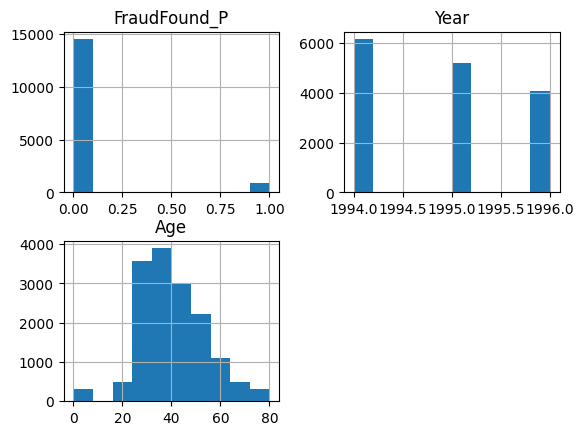

In [ ]:
# Visualization using histogram
df_num.hist()
plt.show()

Now, we'll get the categorical features transformed into numberical features using Ordinal Encoder on the "PastNumberOfClaims" column and One-Hot encoding on the rest.

In [ ]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

categories_order = ["none", "1", "2 to 4", "more than 4"]

encoder = OrdinalEncoder(categories=[categories_order])

df["PastNumberOfClaims"] = encoder.fit_transform(df[["PastNumberOfClaims"]])

In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

columns_to_encode = ['VehicleCategory',
       'Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'BasePolicy',
       'AgentType', 'WitnessPresent']
data_to_encode = df[columns_to_encode]

encoded_data = encoder.fit_transform(data_to_encode)

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

df

,FraudFound_P,Year,Age,PastNumberOfClaims,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,Make_Accura,Make_BMW,Make_Chevrolet,...,MaritalStatus_Widow,Fault_Policy Holder,Fault_Third Party,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,AgentType_External,AgentType_Internal,WitnessPresent_No,WitnessPresent_Yes
0,0.0,1994.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1994.0,34.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1994.0,47.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1994.0,65.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1994.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14749,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
14802,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
14891,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
14938,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


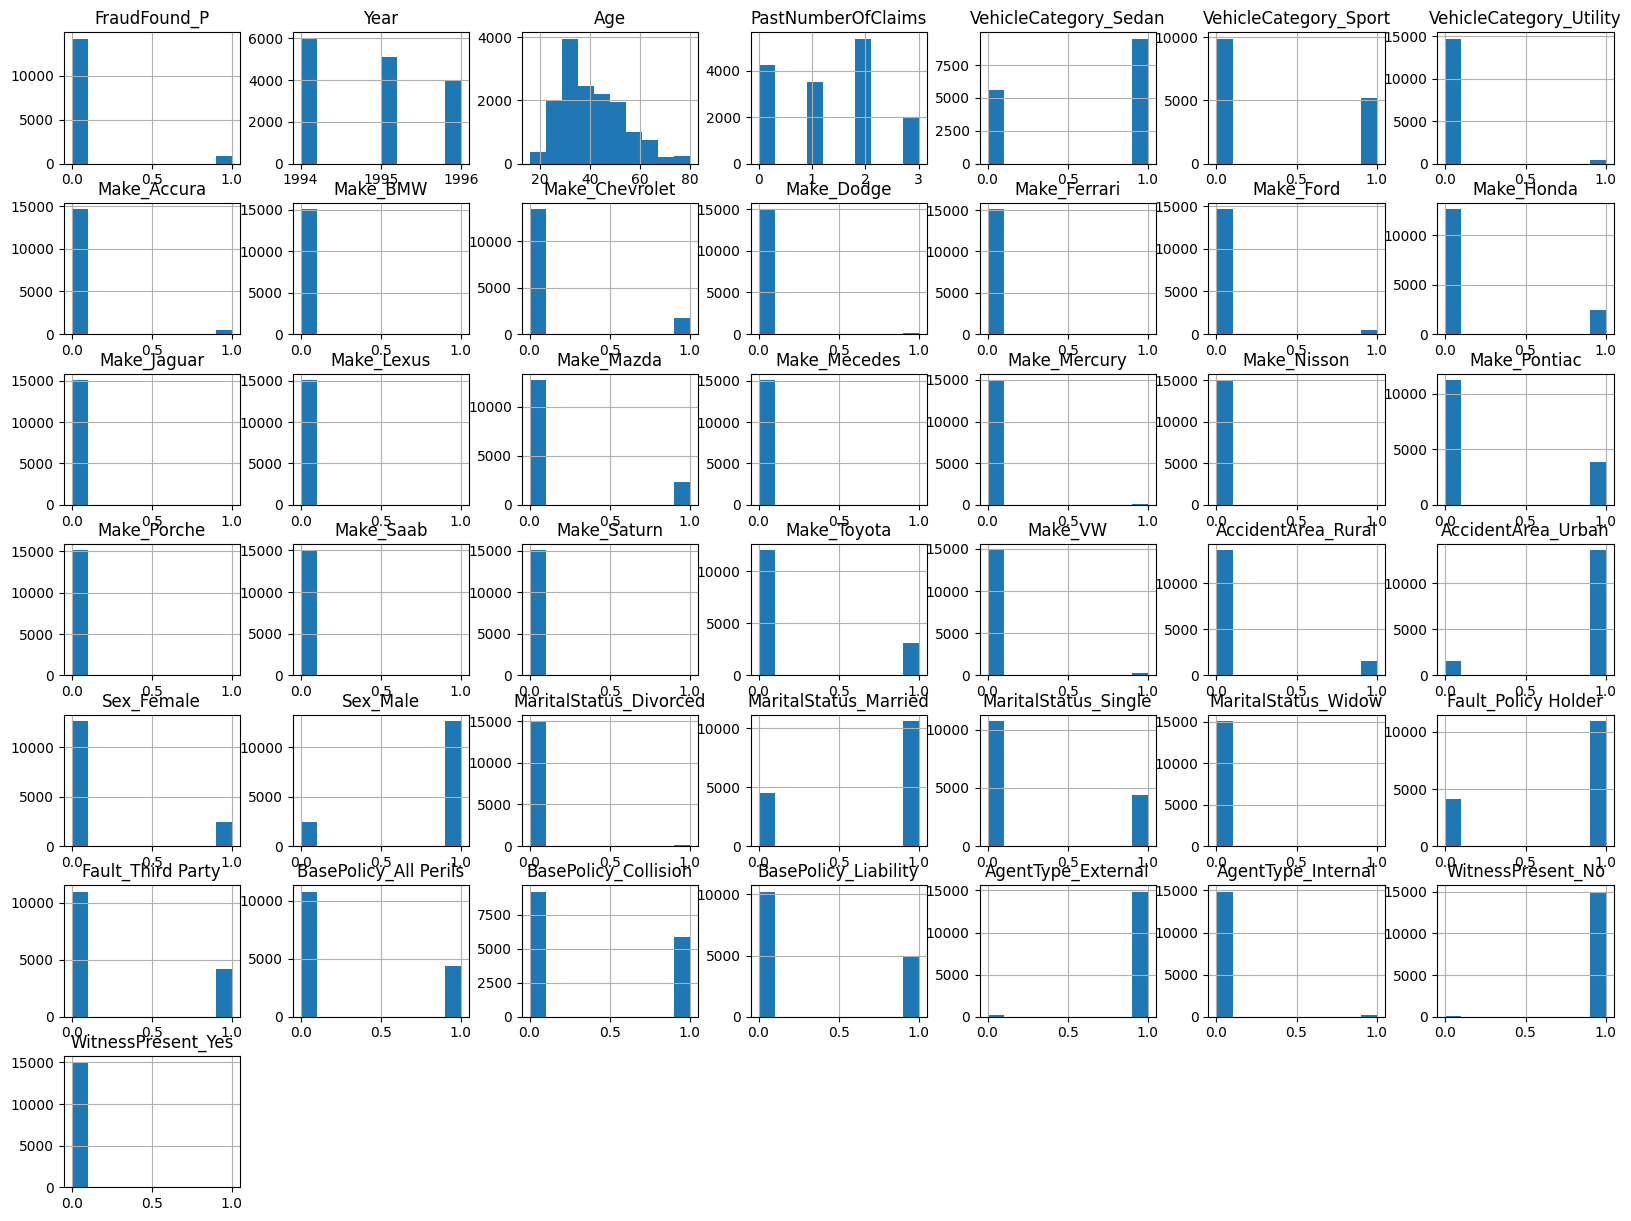

In [ ]:
df.hist(figsize=(20, 15))
plt.show()

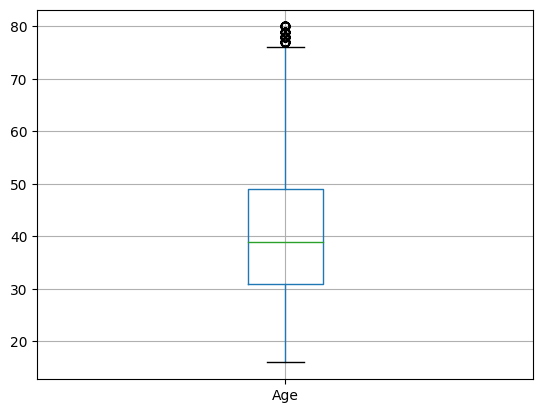

In [ ]:
df[["Age"]].boxplot()
plt.show()

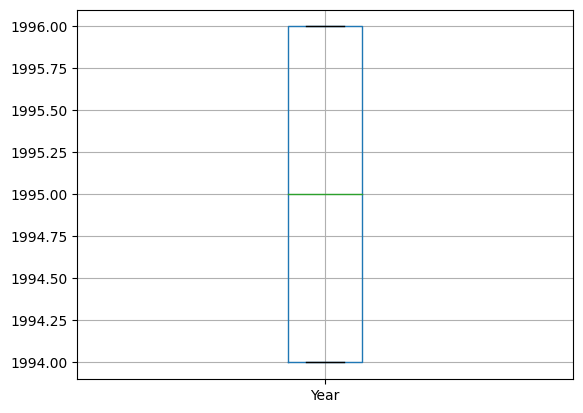

In [ ]:
df[["Year"]].boxplot()
plt.show()

### Observations from the describe method:
* The FraudFound_P column has 0s and 1s, representing fraud (1) or legitimate (0) claim.
* The dataset has "year" values between 1994 and 1996, with the mean at 1994.87 and standard deviation of 0.8.
* The age of the person claiming has values between 16 and 80 with a mean of 40.7 and standard deviation of 12.3

### Observations from the Histograms:
* The Age columns resembles the bell curve slightly which menas that the values are well distributed.
* We will scale our numerical features using Standard Scaler in Scikit Learn to boost the model performance.

### Observations from the Boxplots:
* The year columns is well balanced with no outliers
* The Age columns has quite a few outliers that could bring the model's performace down.
* Using Standard Scaler in sklearn to scale the numerical features will resolve with the issues that outliers might create for the models.

We can see that we have more cases of legitimate claims than fraud. While splitting the dataset we'll use stratified sampling to get balanced training, validation, and testing sets.



## Correlation and Scatter Plots

In [ ]:
corr_matrix = df[["FraudFound_P", "Year", "Age"]].corr()
corr_matrix

,FraudFound_P,Year,Age
FraudFound_P,1.000000,-0.017972,-0.022494
Year,-0.017972,1.000000,0.016682
Age,-0.022494,0.016682,1.000000


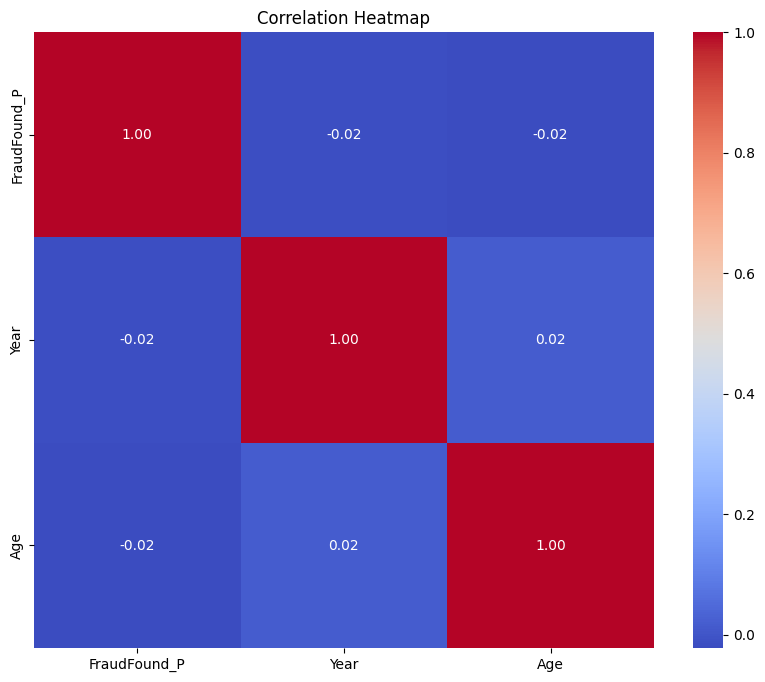

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()